In [1]:
from biomarker_rank import biomarker_rank
from DataLoader import LoadData
from normalize import normalize
from heatmap import plot_heatmap

In [2]:
filename = 'Data' # 다운로드한 데이터가 들어있는 파일 
cancer_list = ['LUAD', 'LUSC'] # 입력 받는 암 데이터 명
df = LoadData(filename, cancer_list)

cancer : LUAD
file : LUAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
cancer : LUSC
file : LUSC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt


In [3]:
rank, importance = biomarker_rank(df, models = [['RF', 'default'],['XGB' , {'colsample_bytree': 0.5, 'n_estimators': 200, 'subsample': 0.75}]])

In [4]:
rank

,ranking_RF,ranking_XGB
?|100130426,2064,172
?|100133144,2064,172
?|100134869,2064,98
?|10357,1668,69
?|10431,2064,172
...,...,...
ZYX|7791,1302,172
ZZEF1|23140,2064,172
ZZZ3|26009,2064,172
psiTPTE22|387590,2064,172


In [5]:
importance

,importances_RF,importances_XGB
?|100130426,0.000000,0.000000
?|100133144,0.000000,0.000000
?|100134869,0.000000,0.000720
?|10357,0.000047,0.001565
?|10431,0.000000,0.000000
...,...,...
ZYX|7791,0.000066,0.000000
ZZEF1|23140,0.000000,0.000000
ZZZ3|26009,0.000000,0.000000
psiTPTE22|387590,0.000000,0.000000


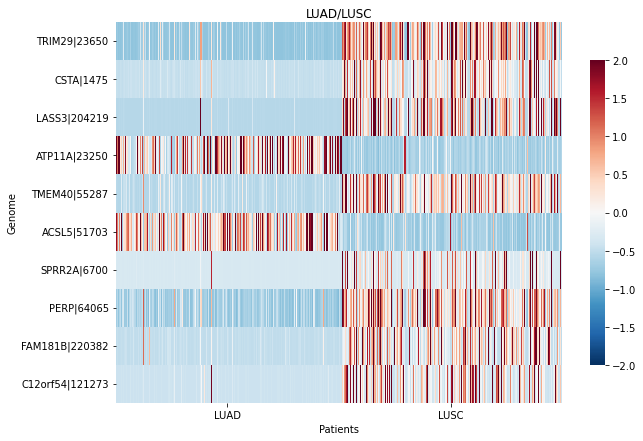

In [6]:
z_score_df = normalize(df, methods = ['z_score'])
gene_list = rank.sort_values(by='ranking_RF').iloc[:10].index
z_score_df = z_score_df.loc[:,gene_list]
plot_heatmap(z_score_df)

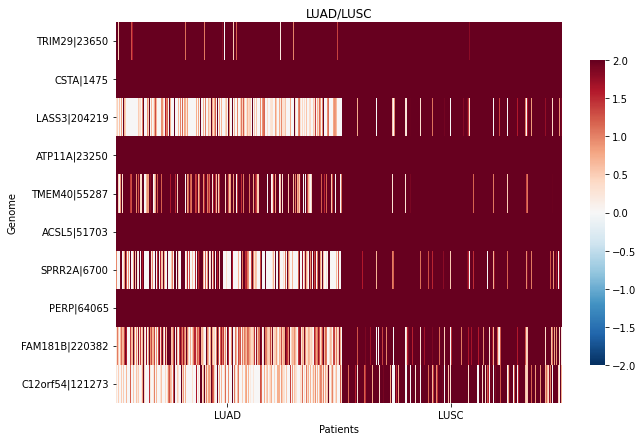

In [7]:
log1p_df = normalize(df, methods = ['log1p'])
gene_list = rank.sort_values(by='ranking_RF').iloc[:10].index
log1p_df = log1p_df.loc[:,gene_list]
plot_heatmap(log1p_df)

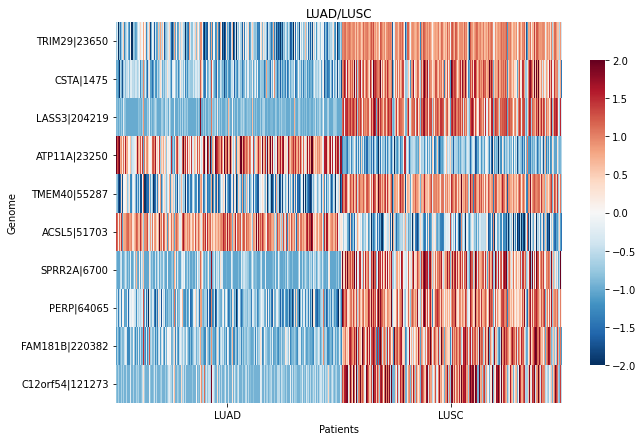

In [8]:
log1p_z_score_mix_df = normalize(df, methods = ['log1p','z_score'])
gene_list = rank.sort_values(by='ranking_RF').iloc[:10].index
log1p_z_score_mix_df = log1p_z_score_mix_df.loc[:,gene_list]
plot_heatmap(log1p_z_score_mix_df)